In [1]:
import geopandas as gpd

fp = 'L4_data/TravelTimes_to_5975375_RailwayStation_Helsinky_test.geojson'
acc = gpd.read_file(fp)
acc.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,GML_ID,NAMEFIN,NAMESWE,NATCODE,geometry
0,29476,41,29483,46,5876274,29990,76,95,24984,77,99,5975375,25532,365,27517366,Helsinki,Helsingfors,091,"POLYGON ((402250.000 6685750.000, 402024.224 6..."
1,29456,41,29462,46,5876275,29866,74,95,24860,75,93,5975375,25408,363,27517366,Helsinki,Helsingfors,091,"POLYGON ((402367.890 6685750.000, 402250.000 6..."
2,36772,50,36778,56,5876278,33541,116,137,44265,130,146,5975375,31110,444,27517366,Helsinki,Helsingfors,091,"POLYGON ((403250.000 6685750.000, 403148.515 6..."
3,36898,49,36904,56,5876279,33720,119,141,44444,132,155,5975375,31289,447,27517366,Helsinki,Helsingfors,091,"POLYGON ((403456.484 6685750.000, 403250.000 6..."
4,29411,40,29418,44,5878128,29944,75,95,24938,76,99,5975375,25486,364,27517366,Helsinki,Helsingfors,091,"POLYGON ((402000.000 6685500.000, 401900.425 6..."


In [2]:
acc = acc.loc[acc['pt_r_tt'] >= 0]
acc.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,pt_r_tt,to_id,walk_d,walk_t,GML_ID,NAMEFIN,NAMESWE,NATCODE,geometry
0,29476,41,29483,46,5876274,29990,76,95,24984,77,99,5975375,25532,365,27517366,Helsinki,Helsingfors,091,"POLYGON ((402250.000 6685750.000, 402024.224 6..."
1,29456,41,29462,46,5876275,29866,74,95,24860,75,93,5975375,25408,363,27517366,Helsinki,Helsingfors,091,"POLYGON ((402367.890 6685750.000, 402250.000 6..."
2,36772,50,36778,56,5876278,33541,116,137,44265,130,146,5975375,31110,444,27517366,Helsinki,Helsingfors,091,"POLYGON ((403250.000 6685750.000, 403148.515 6..."
3,36898,49,36904,56,5876279,33720,119,141,44444,132,155,5975375,31289,447,27517366,Helsinki,Helsingfors,091,"POLYGON ((403456.484 6685750.000, 403250.000 6..."
4,29411,40,29418,44,5878128,29944,75,95,24938,76,99,5975375,25486,364,27517366,Helsinki,Helsingfors,091,"POLYGON ((402000.000 6685500.000, 401900.425 6..."


<AxesSubplot:>

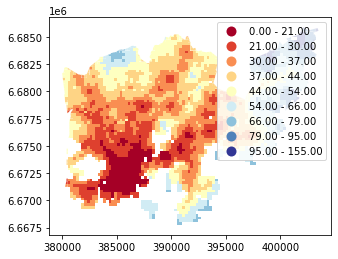

In [3]:
import matplotlib.pyplot as plt

acc.plot(column='pt_r_tt', scheme='NaturalBreaks', k=9, cmap='RdYlBu', legend=True)

<AxesSubplot:>

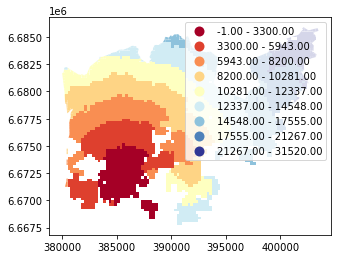

In [4]:
acc.plot(column='walk_d', scheme='NaturalBreaks', k=9, cmap='RdYlBu', legend=True)

In [6]:
import mapclassify

In [7]:
mapclassify.NaturalBreaks(y=acc['pt_r_tt'], k=9)

NaturalBreaks           

    Interval       Count
------------------------
[  0.00,  19.00] |   196
( 19.00,  28.00] |   437
( 28.00,  36.00] |   809
( 36.00,  44.00] |   950
( 44.00,  54.00] |   605
( 54.00,  64.00] |   371
( 64.00,  77.00] |   208
( 77.00,  94.00] |   174
( 94.00, 155.00] |    57

In [8]:
mapclassify.Quantiles(y=acc['pt_r_tt'])

Quantiles               

    Interval       Count
------------------------
[  0.00,  30.00] |   792
( 30.00,  37.00] |   779
( 37.00,  44.00] |   821
( 44.00,  56.00] |   685
( 56.00, 155.00] |   730

In [11]:
classifier = mapclassify.NaturalBreaks(y=acc['pt_r_tt'], k=9)
classifier.bins

array([ 21.,  31.,  39.,  46.,  55.,  66.,  79.,  95., 155.])

In [12]:
# Create a natural breaks classifier using the make method of mapclassifiy.NaturalBreaks
classifier = mapclassify.NaturalBreaks.make(k=9)

In [20]:
classifications = acc[['pt_r_tt']].apply(classifier)
classifications.head()

,pt_r_tt
0,8
1,7
2,8
3,8
4,8


In [21]:
type(classifications)

pandas.core.frame.DataFrame

In [23]:
acc['nb_pt_r_tt'] = acc[['pt_r_tt']].apply(classifier)
acc[['pt_r_tt', 'nb_pt_r_tt']].head()

,pt_r_tt,nb_pt_r_tt
0,99,8
1,93,7
2,146,8
3,155,8
4,99,8


<AxesSubplot:>

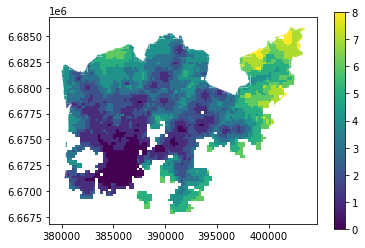

In [26]:
acc.plot(column='nb_pt_r_tt', legend=True)

<AxesSubplot:ylabel='Frequency'>

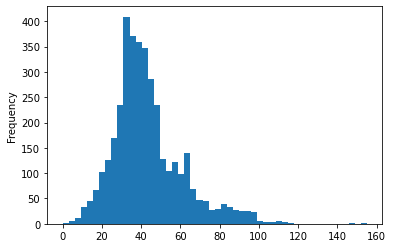

In [28]:
acc['pt_r_tt'].plot.hist(bins=50)

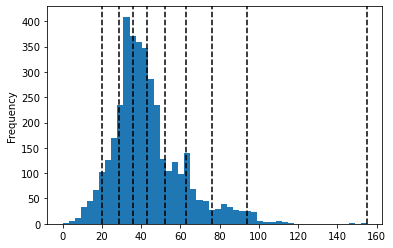

In [37]:
classifier = mapclassify.NaturalBreaks(y=acc['pt_r_tt'], k=9)
acc['pt_r_tt'].plot.hist(bins=50)

for nbin in classifier.bins:
    plt.axvline(nbin, color='k', linestyle='dashed')

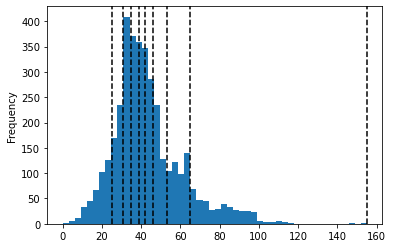

In [36]:
classifier = mapclassify.Quantiles(y=acc['pt_r_tt'], k=9)
acc['pt_r_tt'].plot.hist(bins=50)

for nbin in classifier.bins:
    plt.axvline(nbin, color='k', linestyle='dashed')

In [38]:
col = 'car_r_t'

<AxesSubplot:>

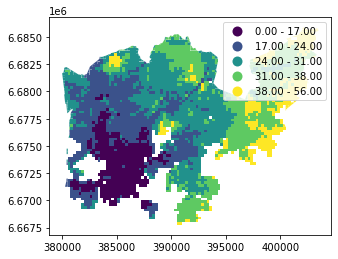

In [41]:
acc.plot(column=col, scheme='NaturalBreaks', legend=True)

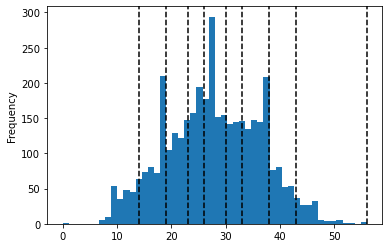

In [48]:
classifier = mapclassify.NaturalBreaks(y=acc[col], k=9)
acc[col].plot.hist(bins=50)
for nbin in classifier.bins:
    plt.axvline(nbin, color='k', linestyle='dashed')

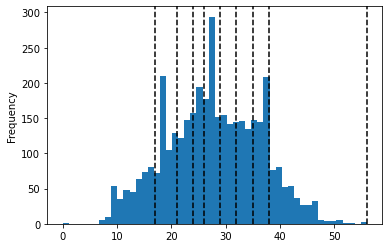

In [49]:
classifier = mapclassify.Quantiles(y=acc[col], k=9)
acc[col].plot.hist(bins=50)
for nbin in classifier.bins:
    plt.axvline(nbin, color='k', linestyle='dashed')

In [61]:
def custom_classifier(row, src_col1, src_col2, threshold1, threshold2, output_col):
    """Custom classifier that can be applied on each row of a pandas dataframe (axis=1).
    
    This function classifies data based on values in two source colunmns and stores the output value
    in the output column.
    Output values is 1 if the value in src_col1 is LOWER than the threshold1 values AND the value in src_col2
    is HIGHER than the threshold2 value.
    In all other cases, otuput value is 0
    
    Args:
        row: one row of data
        src_col1: source column name associated with threshold1
        src_col2: source column name associated with threshold2
        threshold1: upper threshold value for src_col1
        threshold2: lower threshold value for src_col2
        output_col: output column name
        
    Returns:
        update row of data.
    """
    row[output_col] = 1 if row[src_col1] < threshold1 and row[src_col2] > threshold2 else 0
    return row
    

In [63]:
acc['suitable_area'] = None
acc = acc.apply(custom_classifier,
          src_col1='pt_r_tt',
          src_col2='walk_d',
          threshold1=20,
          threshold2=4000,
          output_col='suitable_area',
          axis=1)

acc.head()

,car_m_d,car_m_t,car_r_d,car_r_t,from_id,pt_m_d,pt_m_t,pt_m_tt,pt_r_d,pt_r_t,...,to_id,walk_d,walk_t,GML_ID,NAMEFIN,NAMESWE,NATCODE,geometry,nb_pt_r_tt,suitable_area
0,29476,41,29483,46,5876274,29990,76,95,24984,77,...,5975375,25532,365,27517366,Helsinki,Helsingfors,091,"POLYGON ((402250.000 6685750.000, 402024.224 6...",8,0
1,29456,41,29462,46,5876275,29866,74,95,24860,75,...,5975375,25408,363,27517366,Helsinki,Helsingfors,091,"POLYGON ((402367.890 6685750.000, 402250.000 6...",7,0
2,36772,50,36778,56,5876278,33541,116,137,44265,130,...,5975375,31110,444,27517366,Helsinki,Helsingfors,091,"POLYGON ((403250.000 6685750.000, 403148.515 6...",8,0
3,36898,49,36904,56,5876279,33720,119,141,44444,132,...,5975375,31289,447,27517366,Helsinki,Helsingfors,091,"POLYGON ((403456.484 6685750.000, 403250.000 6...",8,0
4,29411,40,29418,44,5878128,29944,75,95,24938,76,...,5975375,25486,364,27517366,Helsinki,Helsingfors,091,"POLYGON ((402000.000 6685500.000, 401900.425 6...",8,0


In [66]:
acc['suitable_area'].value_counts()

0    3798
1       9
Name: suitable_area, dtype: int64

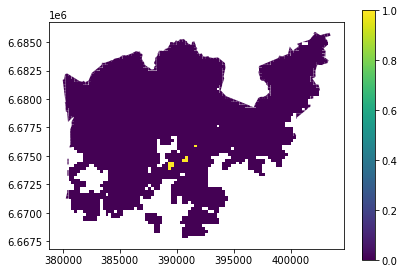

In [67]:
acc.plot(column='suitable_area', legend=True)
plt.tight_layout()